In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
fraud=pd.read_csv('Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
Fraud=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)
Fraud

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [4]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for risky and good
Fraud["Tax"] = pd.cut(Fraud["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])
Fraud

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Tax
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


In [5]:
#creating dummies for the Tax
Fraud = pd.get_dummies(Fraud,columns = ["Tax"],drop_first=True)


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_fraud_df = scaler.fit_transform(Fraud.iloc[:,0:8])
scaled_fraud_df

array([[ 0.52036187, -1.17852072, -0.62914254, ...,  1.32852435,
         0.99335541,  0.51039612],
       [-0.82146395,  0.50850002,  0.27636996, ..., -0.75271484,
         0.99335541,  0.51039612],
       [-0.69829233,  1.03310911,  1.63463872, ..., -0.75271484,
         0.99335541,  0.51039612],
       ...,
       [-0.30074402,  0.90969648, -1.76103318, ..., -0.75271484,
         0.99335541,  0.51039612],
       [ 1.65693986,  1.43219749,  0.1631809 , ..., -0.75271484,
        -1.00668904,  0.51039612],
       [ 1.57776629,  0.9915901 ,  0.04999184, ..., -0.75271484,
        -1.00668904,  0.51039612]])

In [7]:
Fraud['Taxable.Income']=Fraud['Taxable.Income'].astype('category')

In [8]:
x=Fraud.iloc[:,1:8]
y=Fraud.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=0)

In [9]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

In [10]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

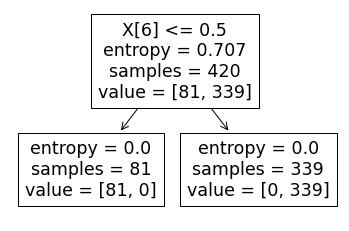

In [11]:
#PLot the decision tree
tree.plot_tree(model);

In [12]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1], dtype=uint8)

In [13]:
model.score(x_test,y_test)

1.0

In [14]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [15]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [16]:
#Prediction and computing the accuracy
y_pred=model.predict(x_test)
np.mean(y_pred==y_test)

1.0

In [17]:
from sklearn.tree import  DecisionTreeRegressor
from sklearn import tree

In [18]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

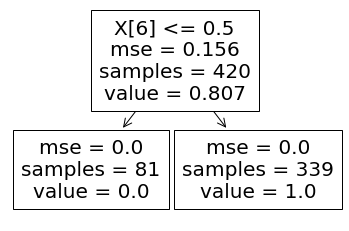

In [19]:
#PLot the decision tree
tree.plot_tree(model);

In [20]:
y_pred=model.predict(x_test)

In [21]:
model.score(x_test,y_test)

1.0